# SF Home Prices
### Here is a practice notebook for looking at Redfin SF home prices and trying to get an idea of prices and sales
**Data**<br>
The data has been pulled from Redfin using their tabluar data and downladed as a .csv.  I'm pulling down data every month to look at the current market and compare it to the past three months of sales.  I also want to look at how much over asking (or under?) that a home goes for.<br><br>
I'm looking at a filter of the data less than 1.25M and at least 3br 2ba homes in and around San Francisco.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [16]:
# How to put together multiple .cvs files together
combined_csv = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))

In [17]:
# Drop the open house column because that isn't relevant
combined_csv.drop(['NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)'], axis=1, inplace=True)

In [18]:
# Double checking that there aren't any duplicates on the MLS#
combined_csv['MLS#'].duplicated().sum()

572

In [19]:
duplicates=combined_csv[combined_csv['ADDRESS'].duplicated()]
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 1 to 349
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SALE TYPE           565 non-null    object 
 1   SOLD DATE           109 non-null    object 
 2   PROPERTY TYPE       565 non-null    object 
 3   ADDRESS             557 non-null    object 
 4   CITY                565 non-null    object 
 5   STATE OR PROVINCE   565 non-null    object 
 6   ZIP OR POSTAL CODE  565 non-null    object 
 7   PRICE               565 non-null    float64
 8   BEDS                558 non-null    float64
 9   BATHS               551 non-null    float64
 10  LOCATION            564 non-null    object 
 11  SQUARE FEET         549 non-null    float64
 12  LOT SIZE            555 non-null    float64
 13  YEAR BUILT          545 non-null    float64
 14  DAYS ON MARKET      564 non-null    float64
 15  $/SQUARE FEET       546 non-null    float64
 16  HOA/MONT

In [20]:
pd.set_option('display.max_rows', 10)
combined_csv.sort_values('MLS#')

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
349,For-Sale-by-Owner Listing,NaN,Single Family Residential,887 Myrtle St #10,Oakland,CA,94607,887000.0,3.0,2.5,...,82.0,634.0,NaN,Active,Fizber.com,11449494,N,Y,37.804864,-122.283532
263,For-Sale-by-Owner Listing,NaN,Single Family Residential,887 Myrtle St #10,Oakland,CA,94607,887000.0,3.0,2.5,...,51.0,634.0,NaN,Active,Fizber.com,11449494,N,Y,37.804864,-122.283532
94,MLS Listing,NaN,Single Family Residential,192 Belcrest,NaN,CA,94015,1250000.0,3.0,1.5,...,6.0,NaN,NaN,Active,GEMLS,202112268,N,Y,37.664658,-122.492429
314,MLS Listing,NaN,Multi-Family (2-4 Unit),1422 98th,Oakland,CA,94603,720000.0,4.0,3.0,...,45.0,385.0,NaN,Active,TheMLS,21-763804,N,Y,37.744597,-122.169572
340,MLS Listing,NaN,Single Family Residential,2531 Heide Ct,El Sobrante,CA,94803,1850000.0,5.0,3.5,...,18.0,446.0,NaN,Active,SDMLS,210026028,N,Y,37.952530,-122.266497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,PAST SALE,NaN,Single Family Residential,79 Karen Ct,San Francisco,CA,94134,1320000.0,4.0,3.0,...,NaN,714.0,NaN,NaN,NaN,NaN,N,Y,37.723285,-122.406829
290,PAST SALE,NaN,Single Family Residential,224 Warren Dr,San Francisco,CA,94131,1600000.0,3.0,2.0,...,NaN,1117.0,NaN,NaN,NaN,NaN,N,Y,37.754296,-122.460702
292,PAST SALE,NaN,Single Family Residential,851 32nd Ave,San Francisco,CA,94121,1000000.0,3.0,2.0,...,NaN,573.0,NaN,NaN,NaN,NaN,N,Y,37.773174,-122.492099
293,PAST SALE,NaN,Single Family Residential,85 Southridge Way,Daly City,CA,94014,1170000.0,4.0,2.0,...,NaN,867.0,NaN,NaN,NaN,NaN,N,Y,37.706094,-122.428991


In [26]:
SALE_TYPE=list(combined_csv['SALE TYPE'].unique())
SALE_TYPE

['MLS Listing',
 'Redfin Data',
 'PAST SALE',
 'New Construction Plan',
 'For-Sale-by-Owner Listing']

In [24]:
STATUS=list(combined_csv['STATUS'].unique())
STATUS

['Active', 'Pre On-Market', 'Sold', nan]

In [33]:
# Separate the data into for sale and past sale for each group.

List=combined_csv[combined_csv['SALE TYPE'].isin(['MLS Listing','For-Sale-by-Owner Listing', 'New Construction Plan','Redfin Data'])]
PAST=combined_csv[combined_csv['SALE TYPE'].isin(['PAST SALE'])]

In [34]:
# Rename the price columns to either list price or sale price depending if they were bought or sold
List=List.rename(columns ={'PRICE':'LIST PRICE'})
PAST=PAST.rename(columns ={'PRICE':'SALE PRICE'})

In [35]:
print(List.shape,PAST.shape)

(2276, 24) (467, 24)


In [ ]:
# Attempt to make a list of features that don't overlap on each so I can merge the data better
features = list(List.keys())
features.remove('SALE TYPE')
features.remove('SOLD DATE')
features.remove('STATUS')
features.remove('LIST PRICE')
features.remove('DAYS ON MARKET')
features.remove('HOA/MONTH')
features
# This made a mess of things

In [42]:
PAST_Features=PAST[['ADDRESS','CITY','STATE OR PROVINCE','MLS#','SALE PRICE']]

In [43]:
df0=List.merge(PAST,on=['ADDRESS','CITY','STATE OR PROVINCE','MLS#'], how="left")
df0.sort_values('ADDRESS')

,SALE TYPE_x,SOLD DATE_x,PROPERTY TYPE_x,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE_x,LIST PRICE,BEDS_x,BATHS_x,...,YEAR BUILT_y,DAYS ON MARKET_y,$/SQUARE FEET_y,HOA/MONTH_y,STATUS_y,SOURCE_y,FAVORITE_y,INTERESTED_y,LATITUDE_y,LONGITUDE_y
2201,MLS Listing,NaN,Vacant Land,0 Wildcat Canyon Rd,Berkeley,CA,94708,249000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,MLS Listing,NaN,Multi-Family (2-4 Unit),1 - 3 Downey St,San Francisco,CA,94117,2599000.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156,MLS Listing,NaN,Single Family Residential,1 Hill Point Ave,San Francisco,CA,94117,2999000.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,MLS Listing,NaN,Single Family Residential,1 Ignacio Ave,San Francisco,CA,94124,1775000.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,MLS Listing,NaN,Single Family Residential,1 Ignacio Ave,San Francisco,CA,94124,1698000.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1614,MLS Listing,NaN,Single Family Residential,NaN,San Francisco,CA,94122,1888888.0,4.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1622,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1777,MLS Listing,NaN,Multi-Family (2-4 Unit),NaN,Oakland,CA,94608,900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df1=List.merge(PAST_Features,on=['ADDRESS','CITY','STATE OR PROVINCE','MLS#'], how="left")
df1.sort_values('ADDRESS')

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,LIST PRICE,BEDS,BATHS,...,$/SQUARE FEET,HOA/MONTH,STATUS,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,SALE PRICE
2201,MLS Listing,NaN,Vacant Land,0 Wildcat Canyon Rd,Berkeley,CA,94708,249000.0,NaN,NaN,...,NaN,NaN,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40968102,N,Y,37.904169,-122.267294,NaN
1384,MLS Listing,NaN,Multi-Family (2-4 Unit),1 - 3 Downey St,San Francisco,CA,94117,2599000.0,6.0,3.0,...,954.0,NaN,Active,San Francisco MLS,421571699,N,Y,37.766779,-122.447267,NaN
1156,MLS Listing,NaN,Single Family Residential,1 Hill Point Ave,San Francisco,CA,94117,2999000.0,5.0,2.0,...,975.0,NaN,Active,San Francisco MLS,421605039,N,Y,37.764751,-122.455946,NaN
1257,MLS Listing,NaN,Single Family Residential,1 Ignacio Ave,San Francisco,CA,94124,1775000.0,3.0,3.0,...,868.0,NaN,Active,San Francisco MLS,421601557,N,Y,37.715171,-122.388744,NaN
1929,MLS Listing,NaN,Single Family Residential,1 Ignacio Ave,San Francisco,CA,94124,1698000.0,3.0,3.0,...,831.0,NaN,Active,San Francisco MLS,421601557,N,Y,37.715171,-122.388744,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,882.0,NaN,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961148,N,Y,37.691509,-122.454321,NaN
1614,MLS Listing,NaN,Single Family Residential,NaN,San Francisco,CA,94122,1888888.0,4.0,2.5,...,903.0,NaN,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40964213,N,Y,37.760590,-122.483592,NaN
1622,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,882.0,NaN,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961148,N,Y,37.691509,-122.454321,NaN
1777,MLS Listing,NaN,Multi-Family (2-4 Unit),NaN,Oakland,CA,94608,900000.0,NaN,NaN,...,510.0,NaN,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40973783,N,Y,37.848423,-122.284639,NaN


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2295
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SALE TYPE           2296 non-null   object 
 1   SOLD DATE           0 non-null      object 
 2   PROPERTY TYPE       2296 non-null   object 
 3   ADDRESS             2287 non-null   object 
 4   CITY                2295 non-null   object 
 5   STATE OR PROVINCE   2296 non-null   object 
 6   ZIP OR POSTAL CODE  2296 non-null   object 
 7   LIST PRICE          2296 non-null   float64
 8   BEDS                2280 non-null   float64
 9   BATHS               2251 non-null   float64
 10  LOCATION            2295 non-null   object 
 11  SQUARE FEET         2244 non-null   float64
 12  LOT SIZE            2226 non-null   float64
 13  YEAR BUILT          2209 non-null   float64
 14  DAYS ON MARKET      2289 non-null   float64
 15  $/SQUARE FEET       2208 non-null   float64
 16  HOA/MO

**Only 55 have a null in the sales price**

In [48]:
# find out how much over asking the huses went for
df0['MARKUP']=df0['SALE PRICE']-df0['LIST PRICE']
df0

,SALE TYPE_x,SOLD DATE_x,PROPERTY TYPE_x,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE_x,LIST PRICE,BEDS_x,BATHS_x,...,DAYS ON MARKET_y,$/SQUARE FEET_y,HOA/MONTH_y,STATUS_y,SOURCE_y,FAVORITE_y,INTERESTED_y,LATITUDE_y,LONGITUDE_y,MARKUP
0,MLS Listing,NaN,Single Family Residential,2986 Bella Dr,Concord,CA,94519,729000.0,3.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLS Listing,NaN,Single Family Residential,4747 Cunningham St,Oakland,CA,94619,849000.0,3.0,2.0,...,15.0,631.0,NaN,Sold,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.786508,-122.182077,131000.0
2,MLS Listing,NaN,Single Family Residential,4747 Cunningham St,Oakland,CA,94619,849000.0,3.0,2.0,...,65.0,631.0,NaN,Sold,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.786508,-122.182077,131000.0
3,MLS Listing,NaN,Single Family Residential,14940 Riverdale St,San Leandro,CA,94578,799000.0,3.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MLS Listing,NaN,Single Family Residential,5366 Leona St,Oakland,CA,94619,995000.0,4.0,3.0,...,16.0,486.0,NaN,Sold,"bridgeMLS, Bay East AOR, or Contra Costa AOR",N,Y,37.786440,-122.175204,105000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,MLS Listing,NaN,Condo/Co-op,1731 Powell #204,San Francisco,CA,94134,2450000.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2292,MLS Listing,NaN,Multi-Family (2-4 Unit),150-152 21st Ave,SAN FRANCISCO,CA,94121,2400000.0,7.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2293,MLS Listing,NaN,Multi-Family (2-4 Unit),1502 Peralta St,Oakland,CA,94607,777777.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2294,MLS Listing,NaN,Multi-Family (2-4 Unit),343 - 345 Russia Ave,San Francisco,CA,94112,950000.0,5.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Wait a minute.  I think this merge didn't go well. 
df0['MLS#'].duplicated().sum()
# Yep.  There are duplicates in the MLS# so it didn't merge correctly.  I shouldn't have this.

447

In [19]:
df0['ADDRESS'].duplicated().sum()
# There are duplicated addresses?

473

In [20]:
df0['ADDRESS'].isna().sum()
# Nine are NaN for address... So I should drop them.

9

In [21]:
df0[df0['ADDRESS'].isna()]

,SALE TYPE_x,SOLD DATE_x,PROPERTY TYPE_x,ADDRESS,CITY_x,STATE OR PROVINCE_x,ZIP OR POSTAL CODE_x,LIST PRICE,BEDS_x,BATHS_x,...,$/SQUARE FEET_y,HOA/MONTH_y,STATUS_y,SOURCE_y,FAVORITE_y,INTERESTED_y,LATITUDE_y,LONGITUDE_y,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)_y,MARKUP
60,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,MLS Listing,NaN,Single Family Residential,NaN,Oakland,CA,94605,679000.0,4.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,MLS Listing,NaN,Single Family Residential,NaN,San Leandro,CA,94578,775000.0,4.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1614,MLS Listing,NaN,Single Family Residential,NaN,San Francisco,CA,94122,1888888.0,4.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1622,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1050000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1777,MLS Listing,NaN,Multi-Family (2-4 Unit),NaN,Oakland,CA,94608,900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2250,MLS Listing,NaN,Single Family Residential,NaN,Daly City,CA,94014,1300000.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df0.dropna(subset=['ADDRESS'],inplace=True)
df0['ADDRESS'].isna().sum()

0

In [23]:
df0['MARKUP'].describe()

count        55.000000
mean     164370.727273
std      152599.034960
min      -34000.000000
25%       51000.000000
50%      131000.000000
75%      246000.000000
max      624500.000000
Name: MARKUP, dtype: float64

<AxesSubplot:ylabel='Frequency'>

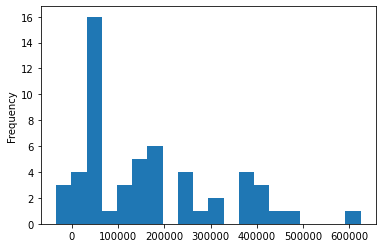

In [24]:
# The issue here is some data is the same in both... So I need only the data that changes from one to another. 
# I need to only look at asking vs sold not data vs data1 prices
df0['MARKUP'].plot.hist(bins=20)

<AxesSubplot:ylabel='Density'>

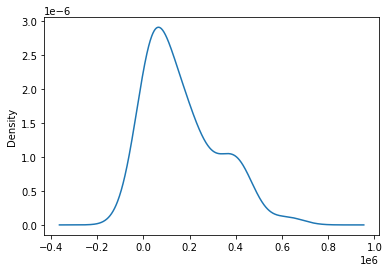

In [25]:
df0['MARKUP'].plot.kde()

In [26]:
# most houses are marked up between 20-40%... That could be a lot for a million dollar home.

In [27]:
# Lets try this again but only get a few columns from the past data so I don't have as many address_x and address_y and the lot.
df1=List.merge(PAST[['SOLD DATE', 'ADDRESS', 'MLS#', 'SALE PRICE']],on=['MLS#','ADDRESS'], how="inner")
df1.sort_values('ADDRESS')

,SALE TYPE,SOLD DATE_x,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,LIST PRICE,BEDS,BATHS,...,STATUS,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOLD DATE_y,SALE PRICE
27,MLS Listing,NaN,Single Family Residential,1014 10th St,OAKLAND,CA,94607,869000.0,4.0,2.0,...,Active,MLSListings,ML81857591,N,Y,37.806163,-122.284218,NaN,October-18-2021,865000.0
26,MLS Listing,NaN,Single Family Residential,1014 10th St,OAKLAND,CA,94607,899000.0,4.0,2.0,...,Active,MLSListings,ML81857591,N,Y,37.806163,-122.284218,NaN,October-18-2021,865000.0
42,MLS Listing,NaN,Single Family Residential,108 Marietta Dr,SAN FRANCISCO,CA,94127,1095000.0,3.0,2.0,...,Active,MLSListings,ML81864123,N,Y,37.740970,-122.448427,NaN,October-29-2021,1500000.0
43,MLS Listing,NaN,Single Family Residential,108 Marietta Dr,SAN FRANCISCO,CA,94127,1095000.0,3.0,2.0,...,Active,MLSListings,ML81864123,N,Y,37.740970,-122.448427,NaN,October-29-2021,1500000.0
41,MLS Listing,NaN,Single Family Residential,108 Marietta Dr,SAN FRANCISCO,CA,94127,1095000.0,3.0,2.0,...,Active,MLSListings,ML81864123,N,Y,37.740970,-122.448427,NaN,October-29-2021,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,NaN,August-27-2021,1250000.0
13,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,NaN,August-27-2021,1250000.0
8,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,NaN,August-27-2021,1250000.0
20,MLS Listing,NaN,Single Family Residential,882 Moultrie St,San Francisco,CA,94110,995000.0,3.0,2.0,...,Active,San Francisco MLS,421575811,N,Y,37.733463,-122.416530,NaN,August-25-2021,1230000.0


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    55 non-null     object 
 1   SOLD DATE_x                                                                                  0 non-null      object 
 2   PROPERTY TYPE                                                                                55 non-null     object 
 3   ADDRESS                                                                                      55 non-null     object 
 4   CITY                                                                                         55 non-null     object 
 5   STATE OR PROVINCE                     

In [29]:
df1['MARKUP']=df1['SALE PRICE']-df1['LIST PRICE']
df1['MARKUP'].describe()

count        55.000000
mean     164370.727273
std      152599.034960
min      -34000.000000
25%       51000.000000
50%      131000.000000
75%      246000.000000
max      624500.000000
Name: MARKUP, dtype: float64

<AxesSubplot:ylabel='Density'>

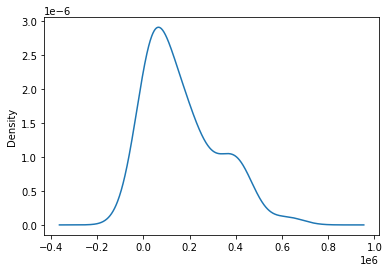

In [30]:
df1['MARKUP'].plot.kde()

In [31]:
print(df0['MARKUP'].describe())
print('')
print(df1['MARKUP'].describe())

count        55.000000
mean     164370.727273
std      152599.034960
min      -34000.000000
25%       51000.000000
50%      131000.000000
75%      246000.000000
max      624500.000000
Name: MARKUP, dtype: float64

count        55.000000
mean     164370.727273
std      152599.034960
min      -34000.000000
25%       51000.000000
50%      131000.000000
75%      246000.000000
max      624500.000000
Name: MARKUP, dtype: float64


In [32]:
print("Most houses are marked up by $",df1['MARKUP'].mode())

Most houses are marked up by $ 0    51000.0
dtype: float64


In [33]:
# same answer and looks neater.

In [38]:
List_1=List[List['LIST PRICE']<=1250000]

In [39]:
df2=List.merge(PAST[['SOLD DATE', 'ADDRESS', 'MLS#', 'SALE PRICE']],on=['MLS#','ADDRESS'], how="inner")
df2['MARKUP']=df2['SALE PRICE']-df2['LIST PRICE']
df2['MARKUP'].describe()

count        55.000000
mean     164370.727273
std      152599.034960
min      -34000.000000
25%       51000.000000
50%      131000.000000
75%      246000.000000
max      624500.000000
Name: MARKUP, dtype: float64

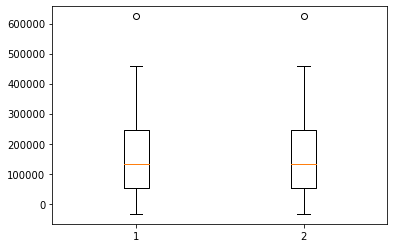

In [40]:
_=plt.boxplot([df2['MARKUP'],df1['MARKUP']])
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x2ebdada7d00>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2ebdada7b20>,
 'cmins': <matplotlib.collections.LineCollection at 0x2ebdadbe520>,
 'cbars': <matplotlib.collections.LineCollection at 0x2ebdadbe850>}

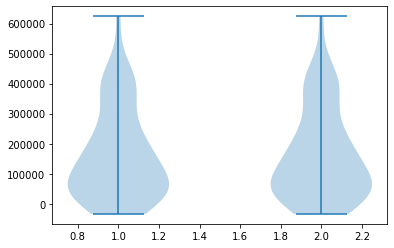

In [44]:
plt.violinplot([df2['MARKUP'],df1['MARKUP']])

In [43]:
df2[df2['MARKUP']<=450000].describe()

,LIST PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SALE PRICE,MARKUP
count,5.200000e+01,52.000000,52.000000,50.000000,49.000000,52.000000,52.000000,50.000000,11.000000,52.000000,52.000000,5.200000e+01,52.000000
mean,1.102096e+06,3.403846,2.394231,1670.420000,4735.428571,1958.846154,11.038462,686.380000,120.454545,37.764514,-122.356691,1.246421e+06,144324.807692
std,2.408759e+05,0.495454,0.435401,337.473391,2775.898781,30.021812,10.169083,203.131393,9.341987,0.072254,0.116271,3.055183e+05,129501.423911
min,6.990000e+05,3.000000,2.000000,1100.000000,1250.000000,1896.000000,1.000000,421.000000,115.000000,37.632812,-122.530083,8.500000e+05,-34000.000000
25%,8.990000e+05,3.000000,2.000000,1436.000000,2672.000000,1942.500000,4.750000,504.000000,115.000000,37.725139,-122.463653,9.800000e+05,51000.000000
50%,1.097500e+06,3.000000,2.500000,1694.000000,3300.000000,1960.000000,9.500000,645.000000,115.000000,37.780310,-122.346652,1.250000e+06,108000.000000
75%,1.199000e+06,4.000000,2.625000,1860.000000,6320.000000,1973.750000,15.250000,779.000000,125.000000,37.806163,-122.273076,1.381000e+06,232000.000000
max,1.995000e+06,4.000000,3.500000,2422.000000,13939.000000,2018.000000,53.000000,1150.000000,135.000000,37.899441,-122.154536,2.300000e+06,405000.000000


In [ ]:
# Taking out the extreme outlieres, The average markup $144,000, most houses are between $51,00 and $176,000.  So plan on having about $100K as a buffer for how much we can bid on a home.

In [45]:
df3=List.merge(PAST[['SOLD DATE', 'ADDRESS', 'MLS#', 'SALE PRICE']],on=['ADDRESS'], how="inner")
df3.sort_values('ADDRESS')

,SALE TYPE,SOLD DATE_x,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,LIST PRICE,BEDS,BATHS,...,SOURCE,MLS#_x,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOLD DATE_y,MLS#_y,SALE PRICE
27,MLS Listing,NaN,Single Family Residential,1014 10th St,OAKLAND,CA,94607,869000.0,4.0,2.0,...,MLSListings,ML81857591,N,Y,37.806163,-122.284218,NaN,October-18-2021,ML81857591,865000.0
26,MLS Listing,NaN,Single Family Residential,1014 10th St,OAKLAND,CA,94607,899000.0,4.0,2.0,...,MLSListings,ML81857591,N,Y,37.806163,-122.284218,NaN,October-18-2021,ML81857591,865000.0
45,MLS Listing,NaN,Single Family Residential,108 Marietta Dr,SAN FRANCISCO,CA,94127,1095000.0,3.0,2.0,...,MLSListings,ML81864123,N,Y,37.740970,-122.448427,NaN,October-29-2021,ML81864123,1500000.0
44,MLS Listing,NaN,Single Family Residential,108 Marietta Dr,SAN FRANCISCO,CA,94127,1095000.0,3.0,2.0,...,MLSListings,ML81864123,N,Y,37.740970,-122.448427,NaN,October-29-2021,ML81864123,1500000.0
43,MLS Listing,NaN,Single Family Residential,108 Marietta Dr,SAN FRANCISCO,CA,94127,1095000.0,3.0,2.0,...,MLSListings,ML81864123,N,Y,37.740970,-122.448427,NaN,October-29-2021,ML81864123,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,NaN,August-27-2021,40960067,1250000.0
13,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,NaN,August-27-2021,40960067,1250000.0
10,MLS Listing,NaN,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1199000.0,4.0,2.5,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076,NaN,August-27-2021,40960067,1250000.0
20,MLS Listing,NaN,Single Family Residential,882 Moultrie St,San Francisco,CA,94110,995000.0,3.0,2.0,...,San Francisco MLS,421575811,N,Y,37.733463,-122.416530,NaN,August-25-2021,421575811,1230000.0


In [59]:
df3['MARKUP']=df3['SALE PRICE']-df3['LIST PRICE']

In [55]:
df3.drop_duplicates().describe()

,LIST PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,SALE PRICE,MARKUP
count,3.900000e+01,39.000000,39.000000,37.000000,36.000000,39.000000,39.000000,35.000000,3.000000,39.000000,39.000000,3.900000e+01,39.000000
mean,1.128820e+06,3.358974,2.397436,1653.108108,4345.722222,1957.769231,12.179487,706.971429,121.666667,37.750929,-122.378595,1.290343e+06,161522.820513
std,2.504547e+05,0.485971,0.475443,323.768589,2806.687276,29.059342,12.026006,198.070767,11.547005,0.062210,0.113676,3.330138e+05,162110.616412
min,6.990000e+05,3.000000,2.000000,1100.000000,1250.000000,1896.000000,1.000000,421.000000,115.000000,37.632812,-122.530083,8.500000e+05,-98000.000000
25%,9.780000e+05,3.000000,2.000000,1410.000000,2507.750000,1936.000000,3.500000,538.500000,115.000000,37.708946,-122.472376,1.025000e+06,43500.000000
50%,1.098000e+06,3.000000,2.000000,1665.000000,3143.500000,1959.000000,9.000000,678.000000,115.000000,37.739618,-122.437652,1.250000e+06,150000.000000
75%,1.249500e+06,4.000000,3.000000,1810.000000,5800.750000,1973.000000,16.500000,792.500000,125.000000,37.793191,-122.284218,1.462500e+06,246000.000000
max,1.995000e+06,4.000000,3.500000,2422.000000,13939.000000,2018.000000,53.000000,1150.000000,135.000000,37.899441,-122.154536,2.300000e+06,624500.000000


In [58]:
df3_no_dup=df3.drop_duplicates()
df3_no_dup['MARKUP'].mode()

0    -20000.0
1         1.0
2     51000.0
3     70000.0
4    151000.0
5    170000.0
dtype: float64

{'bodies': [<matplotlib.collections.PolyCollection at 0x2ebdab72f70>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2ebdab72d00>,
 'cmins': <matplotlib.collections.LineCollection at 0x2ebdab5b1f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2ebdab5b490>}

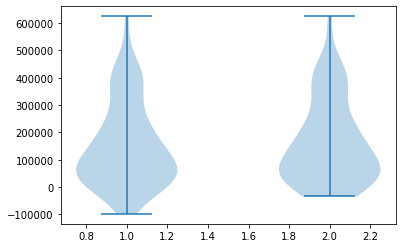

In [49]:
plt.violinplot([df3['MARKUP'],df2['MARKUP']])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ebda88beb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ebdad5e610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ebda88bac0>,
 'medians': [<matplotlib.lines.Line2D at 0x2ebdad5ed90>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ebdad502e0>,
 'means': []}

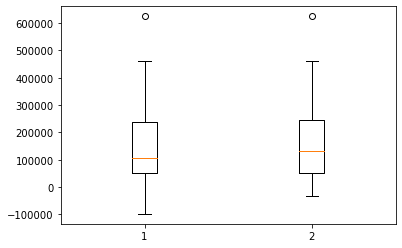

In [50]:
plt.boxplot([df3['MARKUP'],df2['MARKUP']])

In [51]:
df3['MARKUP'].describe()

count        59.000000
mean     153599.830508
std      153761.293196
min      -98000.000000
25%       51000.000000
50%      105000.000000
75%      237500.000000
max      624500.000000
Name: MARKUP, dtype: float64

In [53]:
df3['MARKUP'].mode()

0    51000.0
dtype: float64

## Notes about correlation
If I were to make this data a time series by combining the month and year sold could I look at autocorrelation?  

Is there such a factor influencing home prices?  Seasonal influences, the past influencing the future etc...

Can I use days on market in comparison to the date that the data was downloaded to figure out when the home went on the market?